<a href="https://colab.research.google.com/github/Gurusrinivas12/VITMAS_DATA_SCIENCE_TASK_1/blob/main/Vitmas_task1_Population_of_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1
## Author: GURUSRINIVAS SG
# Task description:
The Population of India dataset is used here to create a Supervised Learning model. This dataset contains numeric attributes such as year, population, yearly % change, yearly change, Migrants (net), Median Age, Fertility Rate,
Density (P/Km²), Urban Pop %, Urban Population, Country's Share of World Pop 
World Population, India Global Rank. In this file, it is shown how to load,handle and make useful visualisations out of the given data.

# Importing required modules

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selectionimport pandas as pd import train_test_split
from sklearn.ensemble import RandomForestClassifier

#**READING DATA SET**

In [ ]:
data= pd.read_csv('india_population.csv')

In [ ]:
data.head()

,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,India Global Rank
0,2020,1380004385,0.99,13586631,-532687,28.4,2.24,464,35.0,483098640,17.70,7794798739,2
1,2019,1366417754,1.02,13775474,-532687,27.1,2.36,460,34.5,471828295,17.71,7713468100,2
2,2018,1352642280,1.04,13965495,-532687,27.1,2.36,455,34.1,460779764,17.73,7631091040,2
3,2017,1338676785,1.07,14159536,-532687,27.1,2.36,450,33.6,449963381,17.74,7547858925,2
4,2016,1324517249,1.10,14364846,-532687,27.1,2.36,445,33.2,439391699,17.75,7464022049,2


In [ ]:
data.tail()

,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,India Global Rank
13,1975,623102897,2.33,13582621,421208,19.7,5.41,210,21.3,132533810,15.27,4079480606,2
14,1970,555189792,2.15,11213294,-68569,19.3,5.72,187,19.7,109388950,15.00,3700437046,2
15,1965,499123324,2.07,9715129,-17078,19.6,5.89,168,18.7,93493844,14.95,3339583597,2
16,1960,450547679,1.91,8133417,-30805,20.2,5.90,152,17.9,80565723,14.85,3034949748,2
17,1955,409880595,1.72,6711079,-21140,20.7,5.90,138,17.6,71958495,14.78,2773019936,2


In [ ]:
data.nunique()

Year                            18
Population                      18
Yearly % Change                 17
Yearly Change                   18
Migrants (net)                  14
Median Age                      14
Fertility Rate                  14
Density (P/Km²)                 18
Urban Pop %                     18
Urban Population                18
Country's Share of World Pop    16
World Population                18
India Global Rank                1
dtype: int64

In [ ]:
data.shape

(18, 13)

In [ ]:
data.isnull().sum() #no missing values

Year                            0
Population                      0
Yearly % Change                 0
Yearly Change                   0
Migrants (net)                  0
Median Age                      0
Fertility Rate                  0
Density (P/Km²)                 0
Urban Pop %                     0
Urban Population                0
Country's Share of World Pop    0
World Population                0
India Global Rank               0
dtype: int64

In [ ]:
print(data.groupby('India Global Rank').size())

India Global Rank
2    18
dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          18 non-null     int64  
 1   Population                    18 non-null     int64  
 2   Yearly % Change               18 non-null     float64
 3   Yearly Change                 18 non-null     int64  
 4   Migrants (net)                18 non-null     int64  
 5   Median Age                    18 non-null     float64
 6   Fertility Rate                18 non-null     float64
 7   Density (P/Km²)               18 non-null     int64  
 8   Urban Pop %                   18 non-null     float64
 9   Urban Population              18 non-null     int64  
 10  Country's Share of World Pop  18 non-null     float64
 11  World Population              18 non-null     int64  
 12  India Global Rank             18 non-null     int64  
dtypes: floa

In [ ]:
data.describe()

,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,India Global Rank
count,18.000000,1.800000e+01,18.000000,1.800000e+01,18.000000,18.000000,18.000000,18.000000,18.000000,1.800000e+01,18.000000,1.800000e+01,18.0
mean,1994.166667,9.649575e+08,1.688889,1.425652e+07,-203260.277778,23.244444,3.892778,324.611111,26.950000,2.809870e+08,16.592222,5.694506e+09,2.0
std,22.350813,3.574762e+08,0.505858,3.480954e+06,306640.859173,3.279387,1.453247,120.108842,6.211683,1.524912e+08,1.207937,1.786229e+09,0.0
min,1955.000000,4.098806e+08,0.990000,6.711079e+06,-532687.000000,19.300000,2.240000,138.000000,17.600000,7.195850e+07,14.780000,2.773020e+09,2.0
25%,1976.250000,6.420654e+08,1.125000,1.358362e+07,-532307.500000,20.300000,2.370000,216.250000,21.725000,1.396358e+08,15.372500,4.174111e+09,2.0
50%,1997.500000,1.010249e+09,1.785000,1.426219e+07,-123552.000000,22.250000,3.655000,339.500000,27.050000,2.734546e+08,16.990000,5.943853e+09,2.0
75%,2015.750000,1.320926e+09,2.130000,1.727104e+07,-18093.500000,27.025000,5.300000,444.000000,33.075000,4.368111e+08,17.725000,7.442966e+09,2.0
max,2020.000000,1.380004e+09,2.330000,1.853059e+07,421208.000000,28.400000,5.900000,464.000000,35.000000,4.830986e+08,17.750000,7.794799e+09,2.0


#Exploring Data Analysis

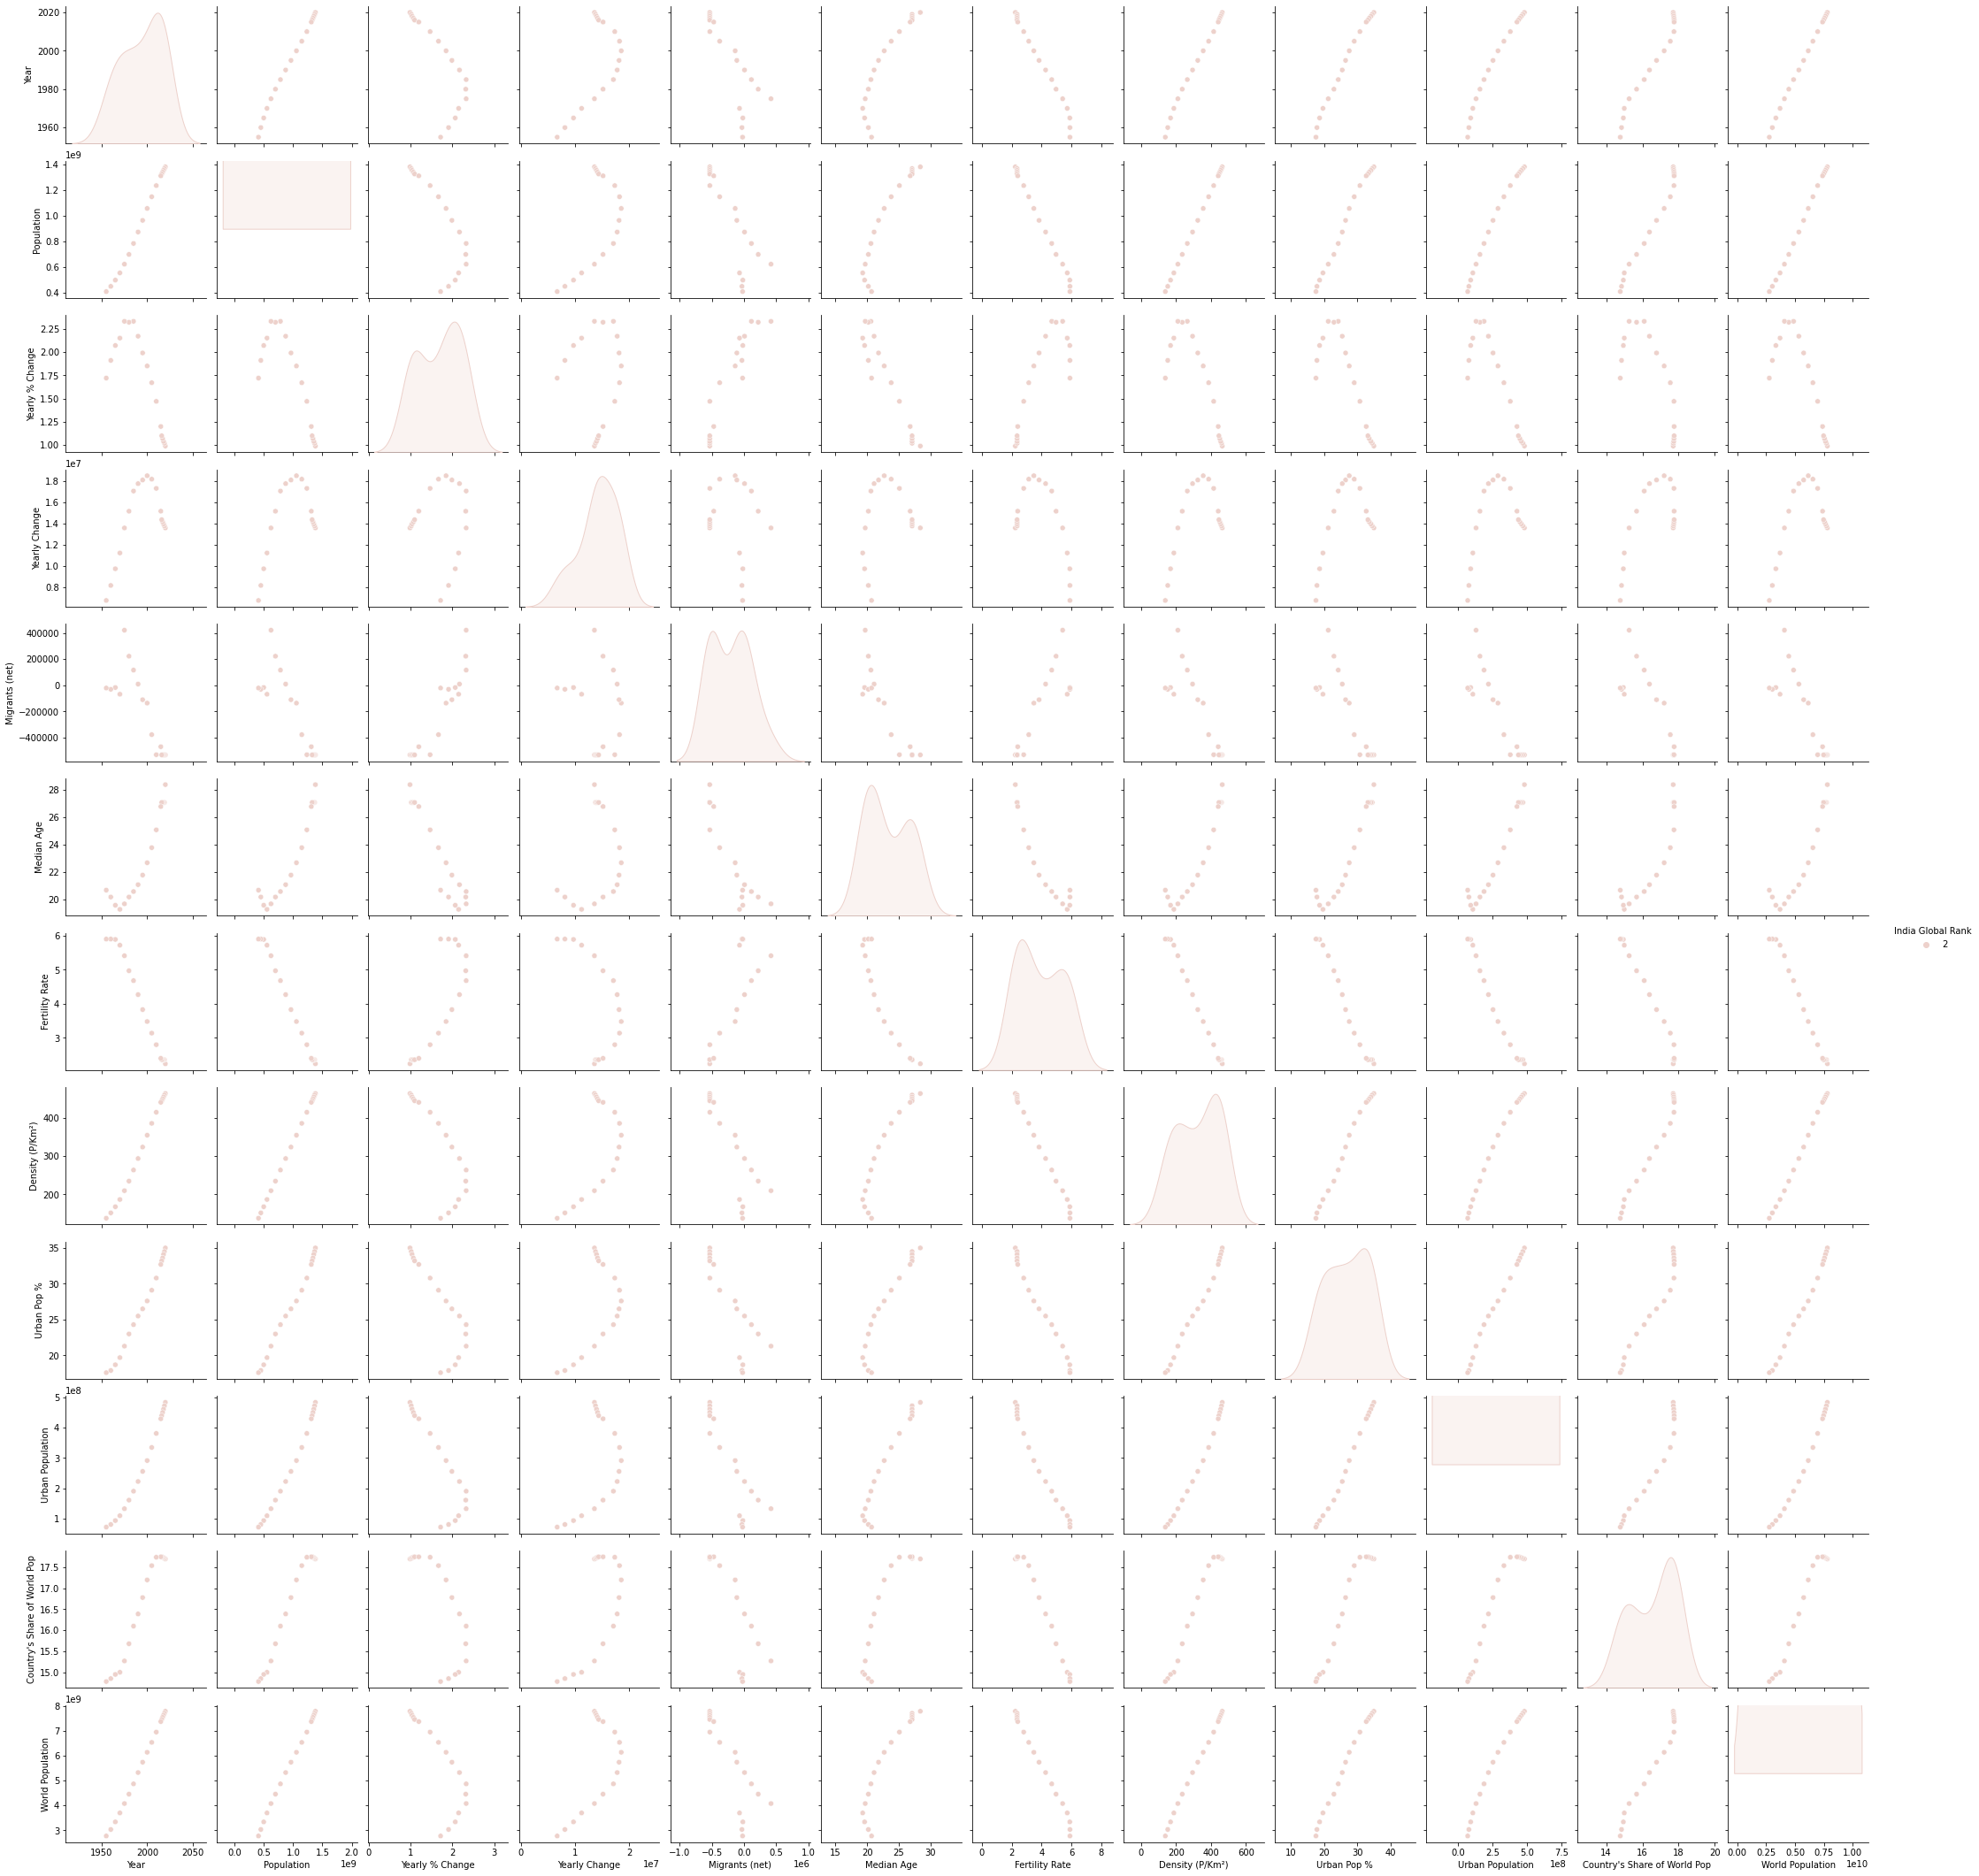

In [ ]:
sns.pairplot(data, hue='India Global Rank')

# Correlation matrix

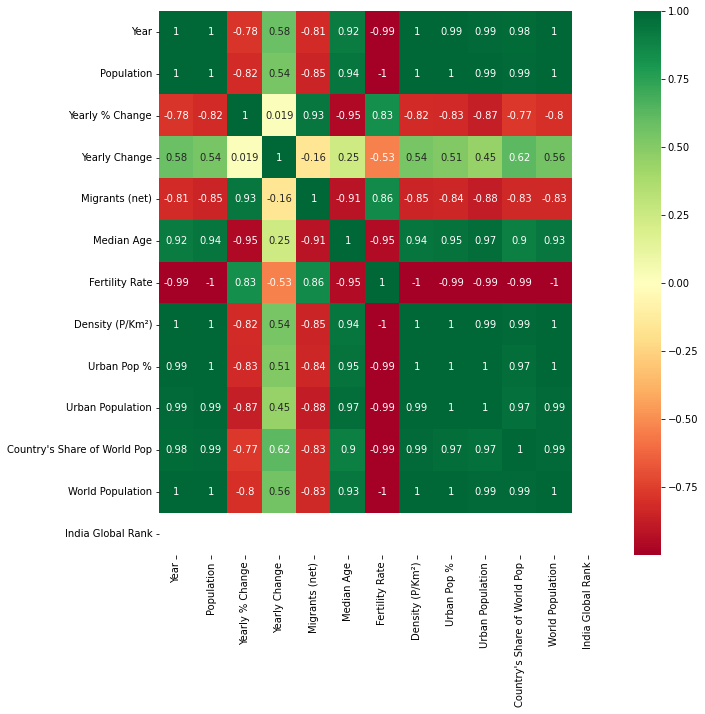

In [ ]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
sns.heatmap(data[top_corr_features].corr(),annot=True, cmap="RdYlGn")

# Histogram features
Sepal length and width


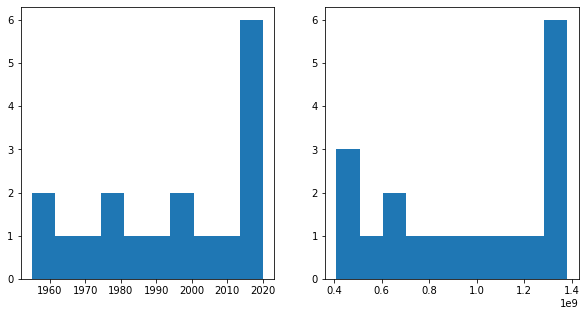

In [ ]:
fig1 = plt.figure(figsize=(10,5))
f1 = fig1.add_subplot(121)
f2 = fig1.add_subplot(122)
f1.hist(data['Year'])
f2.hist(data['Population'])
plt.show()

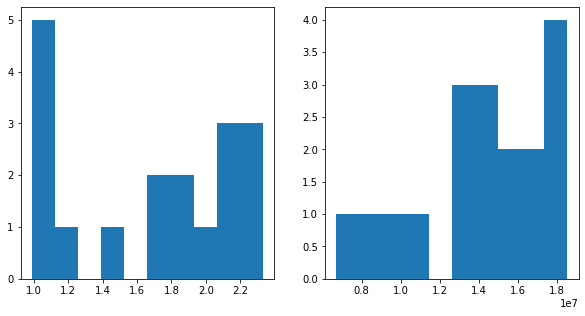

In [8]:
import numpy as np
import matplotlib.pyplot as plt
data= pd.read_csv('india_population.csv') 
fig2 = plt.figure(figsize=(10,5))
f1 = fig2.add_subplot(121)
f2 = fig2.add_subplot(122)
f1.hist(data[ 'Yearly % Change'])
f2.hist(data['Yearly Change'])
plt.show()

# **Box plot feature**

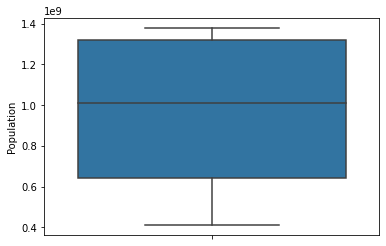

In [13]:
import seaborn as sns
sns.boxplot(y='Population',data=data)

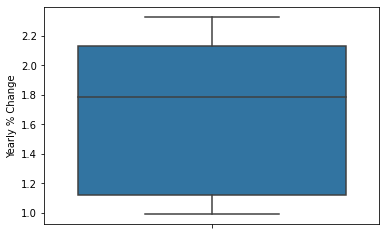

In [14]:
sns.boxplot(y='Yearly % Change',data=data)

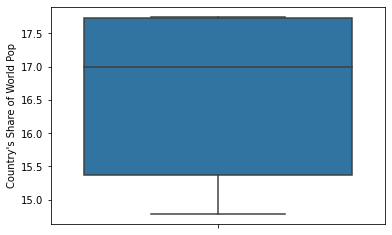

In [15]:
sns.boxplot(y='Country\'s Share of World Pop',data=data)

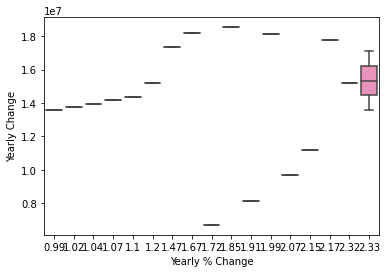

In [16]:
sns.boxplot(x='Yearly % Change',y='Yearly Change',data=data)

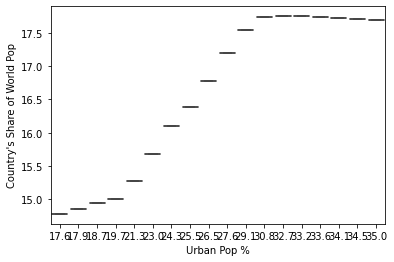

In [18]:
sns.boxplot(x='Urban Pop %',y='Country\'s Share of World Pop',data=data)

#Data splitting

In [21]:
X = data.iloc[:,0:11]
Y = data['Country\'s Share of World Pop']
X.head()

,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop
0,2020,1380004385,0.99,13586631,-532687,28.4,2.24,464,35.0,483098640,17.70
1,2019,1366417754,1.02,13775474,-532687,27.1,2.36,460,34.5,471828295,17.71
2,2018,1352642280,1.04,13965495,-532687,27.1,2.36,455,34.1,460779764,17.73
3,2017,1338676785,1.07,14159536,-532687,27.1,2.36,450,33.6,449963381,17.74
4,2016,1324517249,1.10,14364846,-532687,27.1,2.36,445,33.2,439391699,17.75


In [22]:
Y.head()

0    17.70
1    17.71
2    17.73
3    17.74
4    17.75
Name: Country's Share of World Pop, dtype: float64

#Training model


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8 , random_state=1)
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)


ValueError: ignored

#Performance evaluation

In [41]:
from sklearn.metrics import accuracy_score
pred = rf.predict(X_test)
print("Accracy:",round(accuracy_score(Y_test, pred),5)*100,"%")

AttributeError: ignored